In [1]:
import numpy as np
from pathlib import Path
import pandas as pd

train_df = pd.read_csv(Path('/kaggle/input/playground-series-s4e8/train.csv'))
test_df = pd.read_csv(Path('/kaggle/input/playground-series-s4e8/test.csv'))

In [2]:
train_df.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [3]:
train_df.isna().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [4]:
modes = train_df.mode().iloc[0]
modes

id                         0
class                      p
cap-diameter            1.49
cap-shape                  x
cap-surface                t
cap-color                  n
does-bruise-or-bleed       f
gill-attachment            a
gill-spacing               c
gill-color                 w
stem-height             5.24
stem-width              2.41
stem-root                  b
stem-surface               s
stem-color                 w
veil-type                  u
veil-color                 w
has-ring                   f
ring-type                  f
spore-print-color          k
habitat                    d
season                     a
Name: 0, dtype: object

In [5]:
train_df.fillna(modes, inplace=True)
train_df.isna().sum()

id                      0
class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64

In [6]:
# Numerical columns
train_df.describe(include=(np.number))

,id,cap-diameter,stem-height,stem-width
count,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06
mean,1.558472e+06,6.309842e+00,6.348333e+00,1.115379e+01
std,8.997847e+05,4.657931e+00,2.699755e+00,8.095477e+00
min,0.000000e+00,3.000000e-02,0.000000e+00,0.000000e+00
25%,7.792360e+05,3.320000e+00,4.670000e+00,4.970000e+00
50%,1.558472e+06,5.750000e+00,5.880000e+00,9.650000e+00
75%,2.337708e+06,8.240000e+00,7.410000e+00,1.563000e+01
max,3.116944e+06,8.067000e+01,8.872000e+01,1.029000e+02


<Axes: >

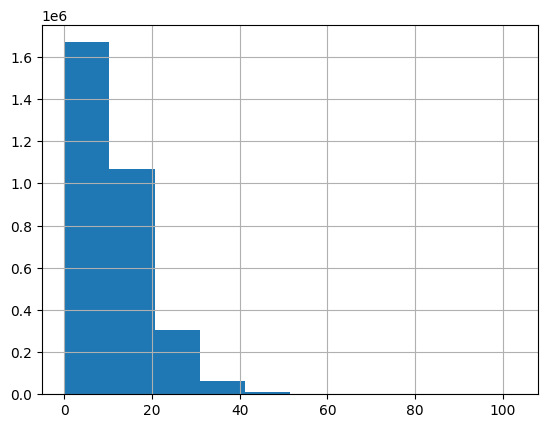

In [7]:
train_df['stem-width'].hist()

In [8]:
# Apply log1p
for num_col in train_df.describe(include=(np.number)):
    train_df[num_col] = np.log1p(train_df[num_col])

<Axes: >

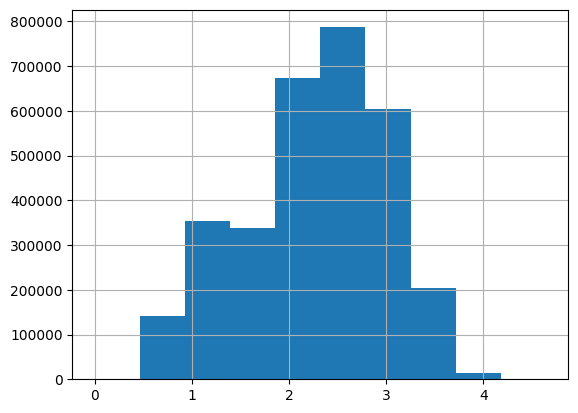

In [9]:
train_df['stem-width'].hist()

In [10]:
# Categorical columns
train_df.describe(include=[object])

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
count,3116945,3116945,3116945,3116945,3116945,3116945,3116945,3116945,3116945,3116945,3116945,3116945,3116945,3116945,3116945,3116945,3116945,3116945
unique,2,74,83,78,26,78,48,63,38,60,59,22,24,23,40,32,52,4
top,p,x,t,n,f,a,c,w,b,s,w,u,w,f,f,k,d,a
freq,1705396,1436066,1131800,1359554,2569751,1169970,2589489,931595,2922824,2308471,1196675,3116866,3020017,2368844,2606050,2956992,2177618,1543321


In [11]:
train_df.columns 

Index(['id', 'class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [12]:
# Get dummy variables for categories
categorical_columns = ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']
train_df = pd.get_dummies(train_df, columns=categorical_columns)

In [13]:
# New columns added
train_df.columns

Index(['id', 'class', 'cap-diameter', 'stem-height', 'stem-width',
       'cap-shape_0.82', 'cap-shape_1.66', 'cap-shape_10.13',
       'cap-shape_10.46', 'cap-shape_11.12',
       ...
       'habitat_u', 'habitat_veil-type', 'habitat_w', 'habitat_x', 'habitat_y',
       'habitat_z', 'season_a', 'season_s', 'season_u', 'season_w'],
      dtype='object', length=809)

In [14]:
# Let's check them
added_columns = ['cap-shape_0.82', 'cap-shape_1.66', 'cap-shape_10.13',
       'cap-shape_10.46', 'habitat_u', 'habitat_veil-type', 'habitat_w', 'habitat_x', 'habitat_y',
       'habitat_z', 'season_a', 'season_s', 'season_u', 'season_w']

In [15]:
train_df[added_columns].head()

,cap-shape_0.82,cap-shape_1.66,cap-shape_10.13,cap-shape_10.46,habitat_u,habitat_veil-type,habitat_w,habitat_x,habitat_y,habitat_z,season_a,season_s,season_u,season_w
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [16]:
train_df.head()

,id,class,cap-diameter,stem-height,stem-width,cap-shape_0.82,cap-shape_1.66,cap-shape_10.13,cap-shape_10.46,cap-shape_11.12,...,habitat_u,habitat_veil-type,habitat_w,habitat_x,habitat_y,habitat_z,season_a,season_s,season_u,season_w
0,0.000000,e,2.282382,1.706565,2.796671,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,0.693147,p,1.706565,1.756132,2.012233,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,1.098612,e,2.071913,2.060514,2.391511,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1.386294,e,1.585145,1.640937,2.018895,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,1.609438,e,1.924249,1.474763,2.236445,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [17]:
import torch
from torch import tensor

train_df['class'] = pd.Categorical(train_df['class']).codes

depVar = torch.tensor(train_df['class'].values)

In [18]:
# Independent variables are all columns except depVar
independent_variables = ['id', 'cap-diameter', 'stem-height', 'stem-width'] + added_columns
# Check the data types of the independent variables
print(train_df[independent_variables].dtypes)
# Convert all boolean columns to integers
train_df[independent_variables] = train_df[independent_variables].astype(int)
independent_tensor = tensor(train_df[independent_variables].values, dtype=torch.float64)

id                   float64
cap-diameter         float64
stem-height          float64
stem-width           float64
cap-shape_0.82          bool
cap-shape_1.66          bool
cap-shape_10.13         bool
cap-shape_10.46         bool
habitat_u               bool
habitat_veil-type       bool
habitat_w               bool
habitat_x               bool
habitat_y               bool
habitat_z               bool
season_a                bool
season_s                bool
season_u                bool
season_w                bool
dtype: object


In [19]:
independent_tensor[:40]

tensor([[0., 2., 1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 2., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 1., 1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [1., 1., 1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 1., 1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 2., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [2., 1., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [2., 2., 1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [2., 2., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [2., 2., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [2., 2., 2., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [2., 1.,

In [20]:
torch.manual_seed(442)

n_coefficients = independent_tensor.shape[1]
coefficients = torch.rand(n_coefficients)-0.5
coefficients

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,
         0.2799, -0.4392,  0.2103,  0.3625,  0.1722,  0.2324, -0.3575, -0.0010,
        -0.1833, -0.2411])

# Linear Model

In [21]:
independent_tensor * coefficients

tensor([[-0.0000,  0.2772,  0.2409,  ..., -0.0000, -0.0000, -0.0000],
        [-0.0000,  0.1386,  0.2409,  ..., -0.0000, -0.0000, -0.2411],
        [-0.4629,  0.2772,  0.4818,  ..., -0.0000, -0.0000, -0.2411],
        ...,
        [-6.4806,  0.2772,  0.4818,  ..., -0.0000, -0.0000, -0.0000],
        [-6.4806,  0.2772,  0.4818,  ..., -0.0000, -0.1833, -0.0000],
        [-6.4806,  0.1386,  0.2409,  ..., -0.0000, -0.1833, -0.0000]],
       dtype=torch.float64)

In [22]:
# Normalize
vals, indices = independent_tensor.max(dim=0)
independent_tensor /= vals

In [23]:
independent_tensor * coefficients

tensor([[-0.0000,  0.0693,  0.0602,  ..., -0.0000, -0.0000, -0.0000],
        [-0.0000,  0.0346,  0.0602,  ..., -0.0000, -0.0000, -0.2411],
        [-0.0331,  0.0693,  0.1205,  ..., -0.0000, -0.0000, -0.2411],
        ...,
        [-0.4629,  0.0693,  0.1205,  ..., -0.0000, -0.0000, -0.0000],
        [-0.4629,  0.0693,  0.1205,  ..., -0.0000, -0.1833, -0.0000],
        [-0.4629,  0.0346,  0.0602,  ..., -0.0000, -0.1833, -0.0000]],
       dtype=torch.float64)

In [24]:
# Let's create a couple predictions from our binary linear model
predictions = torch.sigmoid((independent_tensor*coefficients).sum(axis=1))
predictions[:10]

tensor([0.4156, 0.4355, 0.4508, 0.4416, 0.3992, 0.3992, 0.4508, 0.4057, 0.3996,
        0.4141], dtype=torch.float64)

In [25]:
# Let's compare the predictions to the targets with BCELoss
def loss_function(predictions, target):
    target = target.double()
    loss = F.binary_cross_entropy(predictions, target)
    return loss

In [26]:
import torch.nn.functional as F

loss_function(predictions, depVar)

tensor(0.7845, dtype=torch.float64)

# Gradient Descent

In [27]:
coefficients.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,
         0.2799, -0.4392,  0.2103,  0.3625,  0.1722,  0.2324, -0.3575, -0.0010,
        -0.1833, -0.2411], requires_grad=True)

In [28]:
predictions = torch.sigmoid((independent_tensor*coefficients).sum(axis=1))
loss = loss_function(predictions, depVar)
loss

tensor(0.7845, dtype=torch.float64, grad_fn=<BinaryCrossEntropyBackward0>)

In [29]:
loss.backward()
coefficients.grad

tensor([-2.0099e-01, -5.7095e-02, -6.7102e-02, -7.3126e-02, -2.2247e-07,
         7.8249e-08,  1.4260e-07,  1.3086e-07,  7.1913e-04, -2.3867e-07,
         2.2109e-03,  3.8735e-08, -1.0140e-06, -6.4920e-07, -1.2596e-01,
         4.1267e-04, -8.3690e-02, -4.0590e-04])

In [30]:
with torch.no_grad():
    coefficients.sub_(coefficients.grad * 0.1)
    coefficients.grad.zero_()
    predictions = torch.sigmoid((independent_tensor*coefficients).sum(axis=1))
    print(loss_function(predictions, depVar))

tensor(0.7771, dtype=torch.float64)


In [31]:
# Let's split the data into training and validation
from fastai.data.transforms import RandomSplitter
train_split, validation_split = RandomSplitter(seed=42)(train_df)
train_independent, validation_independent = independent_tensor[train_split], independent_tensor[validation_split]
train_dependent, validation_dependent = depVar[train_split], depVar[validation_split]
len(train_independent), len(validation_independent)

(2493556, 623389)

In [32]:
def gradient_descent(coefficients, lr):
    coefficients.sub_(coefficients.grad * lr)
    coefficients.grad.zero_()

In [33]:
def calculate_predictions(coefficients, independent):
    return torch.sigmoid(independent.float() @ coefficients)

In [34]:
def one_epoch(coefficients, lr):
    predictions = calculate_predictions(coefficients, train_independent)
    loss = loss_function(predictions, train_dependent)
    loss.backward()
    with torch.no_grad():
        gradient_descent(coefficients, lr)
    print(f"{loss:.3f}", end="; ")

In [35]:
def init_coefficients():
    return (torch.randn(n_coefficients)-0.5).requires_grad_()

In [36]:
def train_model(epochs=30, lr=0.01):
    torch.manual_seed(442)
    coefficients = init_coefficients()
    for i in range(epochs): 
        one_epoch(coefficients, lr=lr)
    return coefficients

In [37]:
# Update loss function
# Let's compare the predictions to the targets with BCELoss
def loss_function(predictions, target):
    loss = F.binary_cross_entropy(predictions.float(), target.float())
    return loss

In [38]:
coefficients = init_coefficients()
coefficients = train_model(10, 0.2)

0.958; 0.936; 0.916; 0.897; 0.881; 0.866; 0.853; 0.840; 0.829; 0.819; 

In [39]:
def show_coefficients(): return dict(zip(independent_variables, coefficients.requires_grad_(False)))
show_coefficients()

{'id': tensor(-0.0627),
 'cap-diameter': tensor(0.9248),
 'stem-height': tensor(-0.4807),
 'stem-width': tensor(-0.2645),
 'cap-shape_0.82': tensor(0.4002),
 'cap-shape_1.66': tensor(-0.2999),
 'cap-shape_10.13': tensor(-0.6099),
 'cap-shape_10.46': tensor(-1.0633),
 'habitat_u': tensor(1.0776),
 'habitat_veil-type': tensor(-0.2067),
 'habitat_w': tensor(-1.7583),
 'habitat_x': tensor(0.8253),
 'habitat_y': tensor(-1.1108),
 'habitat_z': tensor(1.3209),
 'season_a': tensor(0.4556),
 'season_s': tensor(-0.9787),
 'season_u': tensor(-1.2279),
 'season_w': tensor(-1.8355)}

In [40]:
predictions = torch.sigmoid((validation_independent.float() @ coefficients))
results = validation_dependent.bool() == (predictions>0.5)
results[:16]

tensor([ True,  True,  True, False,  True,  True, False,  True,  True,  True,
         True,  True, False,  True, False, False])

In [41]:
def accuracy(coefficients):
    return (validation_dependent.bool() == (calculate_predictions(coefficients, validation_independent) > 0.5)).float().mean()

In [42]:
accuracy(coefficients)

tensor(0.5265)

# Adding more layers

In [43]:
n_coefficients = train_independent.shape[1]

def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coefficients, n_hidden)-0.5) / n_hidden
    layer2 = torch.rand(n_hidden, 1) - 0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(), layer2.requires_grad_(), const.requires_grad_()

In [44]:
import torch.nn.functional as F

def calc_preds(coefficients, independent):
    layer1, layer2, const = coefficients
    res = F.relu(independent.float() @ layer1)
    res = res @ layer2 + const
    return torch.sigmoid(res)

In [45]:
def gradient_descent(coefficients, lr):
    for layer in coefficients:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [46]:
def loss_function(predictions, target):
    target = target.float()
    loss = F.binary_cross_entropy(predictions, target.unsqueeze(1))
    return loss

In [47]:
def one_epoch(coefficients, lr):
    predictions = calc_preds(coefficients, train_independent)
    loss = loss_function(predictions, train_dependent)
    loss.backward()

In [48]:
def train_model(epochs=30, lr=0.01):
    torch.manual_seed(442)
    coefficients = init_coeffs()
    for i in range(epochs): 
        one_epoch(coefficients, lr=lr)
    return coefficients

In [49]:
def accuracy(coefficients):
    return (validation_dependent.bool() == (calc_preds(coefficients, validation_independent) > 0.5)).float().mean

In [50]:
coefficients = train_model(epochs = 19, lr=3.3)

In [ ]:
accuracy(coefficients)